In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split #to divide data into training and testing sets

In [280]:
#IMPORT DATASET
dataframe = pd.read_csv('../CSV-files/heart.csv')
dataframe.info()
dataframe.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [281]:
dataframe.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [282]:
#checking the distribution of target values i.e. how many people have heart diseases
dataframe['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [283]:
X = dataframe.drop(columns = ['target'], axis = 1)
Y = dataframe['target']

In [284]:
correlation_matrix = X.corr(method = 'kendall').abs()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.087544  0.074982  0.196697  0.140323  0.092092   
sex       0.087544  1.000000  0.049971  0.060382  0.125464  0.027200   
cp        0.074982  0.049971  1.000000  0.019977  0.070332  0.068938   
trestbps  0.196697  0.060382  0.019977  1.000000  0.086805  0.127838   
chol      0.140323  0.125464  0.070332  0.086805  1.000000  0.027995   
fbs       0.092092  0.027200  0.068938  0.127838  0.027995  1.000000   
restecg   0.123083  0.043863  0.061801  0.114669  0.133852  0.101004   
thalach   0.269678  0.038732  0.255667  0.019825  0.036767  0.013411   
exang     0.064401  0.139157  0.400078  0.036764  0.072897  0.049261   
oldpeak   0.190421  0.077931  0.152024  0.103829  0.043871  0.027901   
slope     0.144727  0.020261  0.154094  0.066334  0.021385  0.046991   
ca        0.272280  0.106804  0.190059  0.071111  0.091229  0.129663   
thal      0.071557  0.234454  0.193061  0.048497  0.067184  0.01

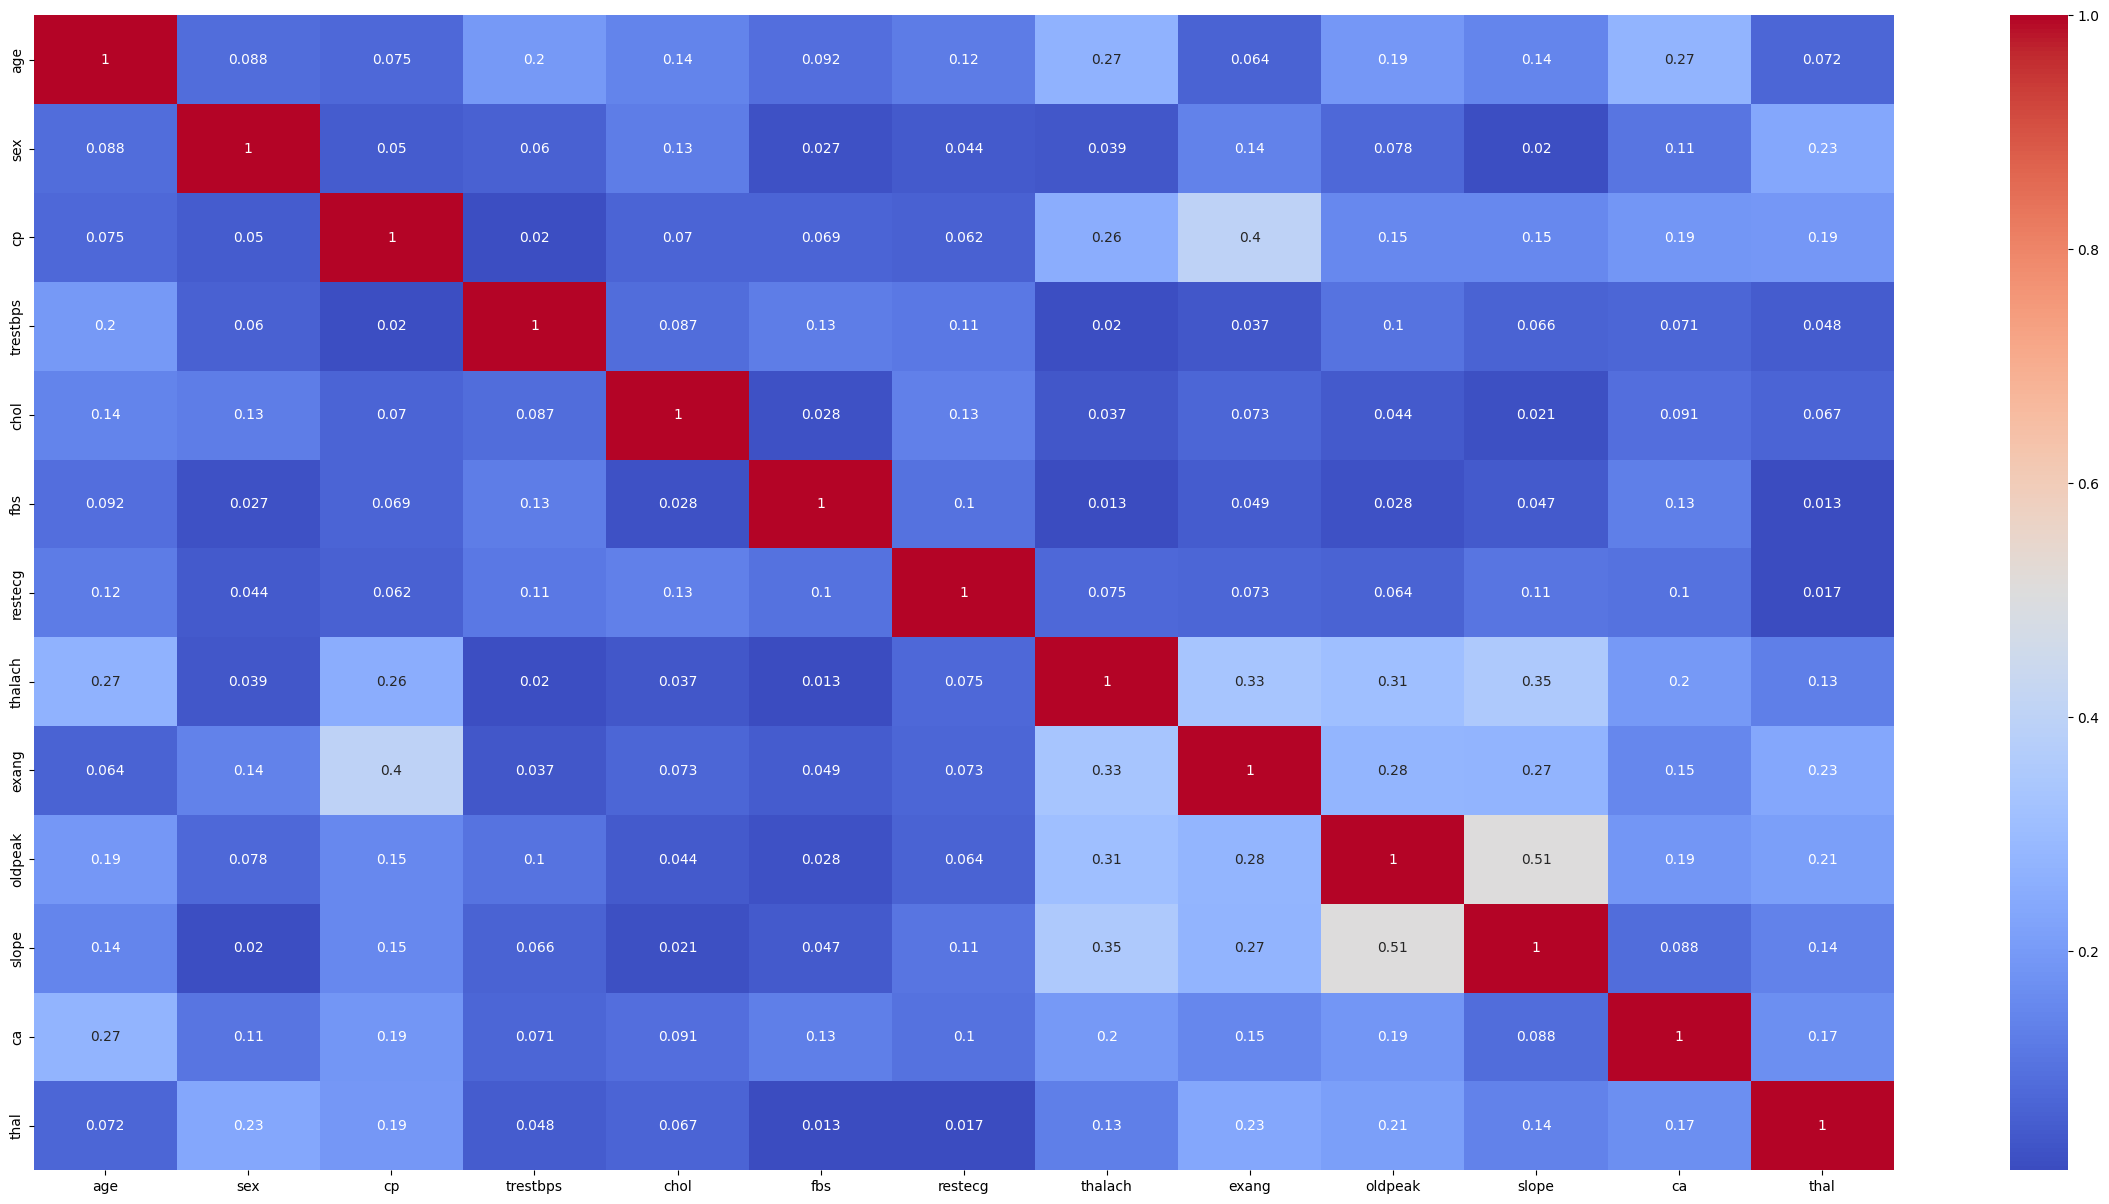

In [285]:
plt.figure(figsize = (30, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [286]:
threshold = 0.88
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > (threshold))]
reduced_data = X.drop(columns=to_drop)
X = reduced_data

In [287]:
print(X.isnull().sum().sum())
print(X)

0
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2

In [288]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [289]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, stratify = Y, random_state = 2)

In [290]:
#LOGISTIC REGRESSION MODEL IMPLEMENTATION
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\Users\Nikunj_Rathore\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [291]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, Y_train)
print("Accuracy Score on Training dataset: ", training_accuracy*100)

Accuracy Score on Training dataset:  86.66666666666667


In [292]:
testing_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction, Y_test)
print("Accuracy Score on Testing dataset: ", testing_accuracy*100)

Accuracy Score on Testing dataset:  82.68292682926828


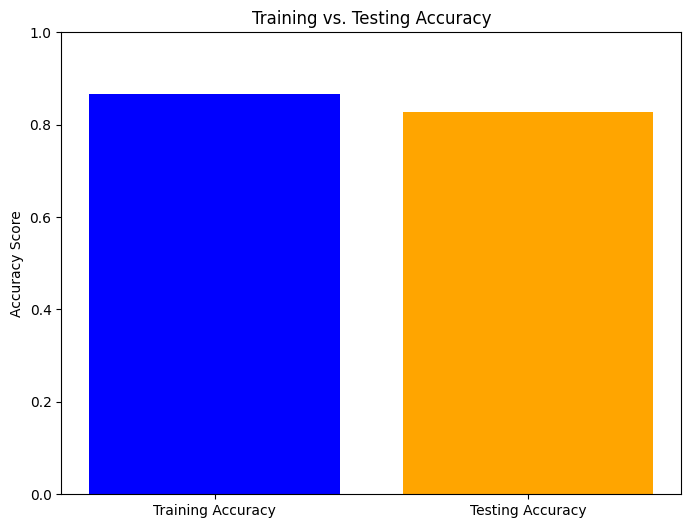

In [293]:
import matplotlib.pyplot as plt
accuracies = [training_accuracy, testing_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy range is from 0 to 1
plt.ylabel('Accuracy Score')
plt.title('Training vs. Testing Accuracy')
plt.show()

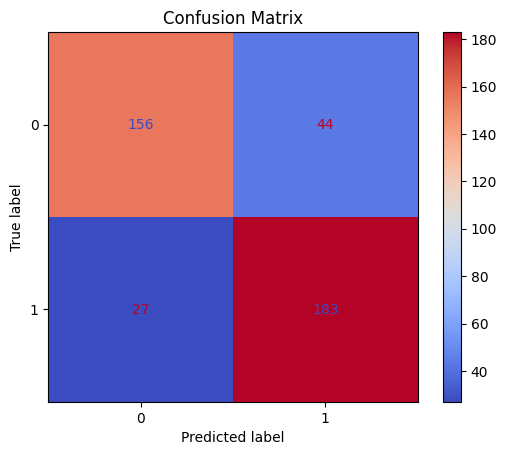

In [294]:
conf_matrix = confusion_matrix(Y_test, testing_prediction, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [295]:
#Creating a prediction system
input_array = (46,1,2,150,231,0,1,147,0,3.6,1,0,2)

#converting the input to a numpy array
numpy_array = np.asarray(input_array)

#reshape the data
reshape_input = numpy_array.reshape(1, -1)

prediction = model.predict(reshape_input) 

if prediction[0] == 0:
    print("Person is Healthy.")
else:
    print("Person has a heart disease.")

Person is Healthy.


c:\Users\Nikunj_Rathore\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [296]:
import pickle

In [297]:
# Save the trained classifier (model) to a file
model_filename = 'heart_disease_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)